## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [43]:
import os
import numpy as np
import math
from numba import jit, njit, vectorize, cuda, numba
from numba import vectorize
os.environ["NUMBA_ENABLE_CUDASIM"] = "1"

In [44]:
@vectorize() 

def vec_log(x):
    return np.log(x)

def vec_exp(x):
    return np.exp(x)

A = np.array([2, 5, 10, 3, 8])

print(vec_log(A))
print(vec_exp(A))

[0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
[7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

In [45]:
@jit(nopython=True) 
def f(x,mean,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(x-mean)**2/sigma**2)

x = np.linspace(-3,3,100000)
print(f(x,1,1))

[0.00013383 0.00013386 0.00013389 ... 0.05400393 0.05399745 0.05399097]


## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

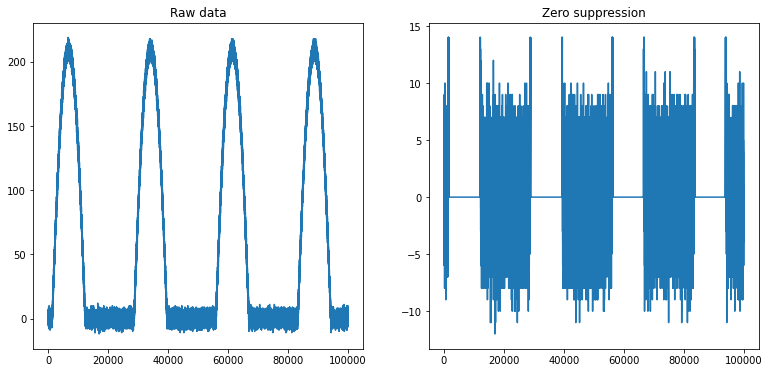

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)
#print(noise)
#print(pulses)
#print(data)
    
#put your code here
@jit
def f(threshold, data):
    x = np.where(data<threshold,data,0)
    return x

threshold = 15    
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 6)
ax[0].set_title("Raw data")
ax[0].plot(data)
ax[1].set_title("Zero suppression")
ax[1].plot(f(threshold, data))


## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [47]:
X = np.random.rand(3,3)
Y = np.random.rand(3,3)

@jit(nopython=True)
def f(matrix_1, matrix_2):
    res = np.array([[0 for x in range(3)] for y in range(3)]).astype(np.float64) 
    for i in range(len(matrix_1)):
        for j in range(len(matrix_2[0])):
            for k in range(len(matrix_2)):
                res[i][j] += matrix_1[i][k] * matrix_2[k][j]
                res[i][j] = math.tanh(alpha*res[i][j]+c)
                return res
alpha = 0.5
c = 0.5
print(f(X,Y))

[[0.65097555 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

In [39]:
@cuda.jit()
def f_3D(io_array):
    x,y,z = cuda.grid(3)
    if x < io_array.size:
        io_array[x] += 1
        elif y < io_array.size:
            io_array[y] += 1
            elif z < io_array.size:
                io_array[z] += 1
                
data = np.random.random((256,256,256))
print(data)

SyntaxError: invalid syntax (<ipython-input-39-9ec6777bba8b>, line 6)

In [49]:
## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.

SyntaxError: invalid syntax (<ipython-input-49-fb03cb7938b1>, line 3)

In [ ]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = 
B = 

# Configure the blocks
threadsperblock = 
blockspergrid_x = 
blockspergrid_y = 
blockspergrid = 

